In [22]:
# math
import numpy as np
# tensorflow
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import regularizers
from keras.datasets import cifar10
# visualization
import matplotlib.pyplot as plt

# Hyperparameters

In [23]:
#hyper parameter
batch_size = 64
#buffer size
buffer_size = 2000
#number of epochs to train
num_epochs = 100
#learning rate for weight adjustment
learning_rate = 0.00001
# optimizer
adam = tf.keras.optimizers.Adam(learning_rate)

# Loading the data set

## Loading `cifar10`

In [24]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

General information on the `cifar10` dataset can be found here: https://www.cs.toronto.edu/%7Ekriz/cifar.html

The documentation of the keras module provides us with information on the output of its `load_data` method: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

```
Returns

Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).

x_train, x_test: uint8 arrays of RGB image data with shape (num_samples, 3, 32, 32) if tf.keras.backend.image_data_format() is 'channels_first', or (num_samples, 32, 32, 3) if the data format is 'channels_last'.

y_train, y_test: uint8 arrays of category labels (integers in range 0-9) each with shape (num_samples, 1). 
```



## Previewing the data

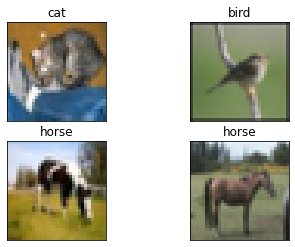

In [25]:
label_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
twothirds_percentile_idx = len(x_test) // 3

fig, axes = plt.subplots(2,2)

axes[0,0].set_title(label_names[y_test[0][0]])
axes[0,0].imshow(x_test[0])

axes[0,1].set_title(label_names[y_test[twothirds_percentile_idx][0]])
axes[0,1].imshow(x_test[twothirds_percentile_idx])

axes[1,0].set_title(label_names[y_test[-twothirds_percentile_idx][0]])
axes[1,0].imshow(x_test[-twothirds_percentile_idx])

axes[1,1].set_title(label_names[y_test[-1][0]])
axes[1,1].imshow(x_test[-1])

for ax in axes.flatten():
    ax.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)

plt.show()

# Input pipeline and preprocessing

## Normalizing the images

In [26]:
# training data
# normalize the images
train_images = tf.keras.utils.normalize(x_train)

# testing data
test_images = tf.keras.utils.normalize(x_test)

## One-hot encoding labels

In [27]:
# train data
# explain why we have to reshape
train_targets = np.reshape(y_train, -1)
# since there are 10 classes of images, we need to one-hot encode to depth 10
train_targets = tf.keras.utils.to_categorical(train_targets, 10)

# do the same for test data
test_targets = np.reshape(y_test, -1)
test_targets = tf.keras.utils.to_categorical(test_targets, 10)

# Building the test data set

Next up we will need to pass the testing data to `ImageDataGenerator.flow()`. In order to do this, we have to first transform it into a `keras` data set. 

In [28]:
test_images = tf.data.Dataset.from_tensor_slices(test_images)
test_targets = tf.data.Dataset.from_tensor_slices(test_targets)
test_dataset = tf.data.Dataset.zip((test_images, test_targets))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True)
test_dataset = test_dataset.shuffle(buffer_size=buffer_size)

## Batching, data augmentation, shuffling

We hand over the entire work of implementing batching and data augmentation to `ImageDataGenerator` class and its method `flow` (https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). The class requires a All we need to do at this point is to create an `ImageDataGenerator` object using the parameters we need in order to get the data augmentation we want. Later, we will be able to call the `ImageDataGenerator` object's `flow` method to generate batches for our model to train on. As if that wasn't convenient enough, `flow` can also shuffle the data for us. 

In [29]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True, shear_range = 0.2, zoom_range = 0.2)

batch_generator = datagen.flow(train_images, train_targets, batch_size = batch_size)

# Building the CNN

In [32]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.regularizers import L2

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv_1 = Conv2D(filters= 64, 
                        kernel_size= (3,3), 
                        input_shape=(32,32,3), 
                        padding='same', 
                        activation= relu, 
                        kernel_regularizer= L2())
    
    self.batch_norm_1 = BatchNormalization()

    self.conv_2 = Conv2D(filters= 64, kernel_size= (3,3), activation= relu, padding= 'same', kernel_regularizer= L2())

    self.batch_norm_2 = BatchNormalization()

    self.conv_3 = Conv2D(filters= 64, kernel_size= (3,3), activation= relu, padding= 'same', kernel_regularizer= L2())

    self.batch_norm_3 = BatchNormalization()

    self.conv_4 = Conv2D(filters= 64, kernel_size= (3,3), activation= relu, padding= 'same', kernel_regularizer= L2())

    self.batch_norm_4 = BatchNormalization()

    self.max_pool_1 = MaxPool2D()

    self.drop_out_1 = Dropout(0.3)
    
    self.conv_5 = Conv2D(filters= 128, kernel_size= (3,3), activation= relu, padding= 'same', kernel_regularizer= L2())

    self.batch_norm_5 = BatchNormalization()

    self.conv_6 = Conv2D(filters= 128, kernel_size= (3,3), activation= relu, padding= 'same', kernel_regularizer= L2())

    self.batch_norm_6 = BatchNormalization()

    self.conv_7 = Conv2D(filters= 128, kernel_size= (3,3), activation= relu, padding= 'same', kernel_regularizer= L2())

    self.batch_norm_7 = BatchNormalization()

    self.conv_8 = Conv2D(filters= 128, kernel_size= (3,3), activation= relu, padding= 'same', kernel_regularizer= L2())

    self.batch_norm_8 = BatchNormalization()

    self.max_pool_2 = MaxPool2D()

    self.drop_out_2 = Dropout(0.3)

    self.conv_9 = Conv2D(filters= 512, kernel_size= (3,3), activation= relu, padding= 'same', kernel_regularizer= L2())

    self.batch_norm_9 = BatchNormalization()

    self.conv_10 = Conv2D(filters= 512, kernel_size= (3,3), activation= relu, padding= 'same', kernel_regularizer= L2())

    self.batch_norm_10 = BatchNormalization()

    self.conv_11 = Conv2D(filters= 512, kernel_size= (3,3), activation= relu, padding= 'same', kernel_regularizer= L2())

    self.batch_norm_11 = BatchNormalization()

    self.conv_12 = Conv2D(filters= 512, kernel_size= (3,3), activation= relu, padding= 'same', kernel_regularizer= L2())

    self.batch_norm_12 = BatchNormalization()

    self.global_pooling = GlobalAveragePooling2D()

    self.dense_1 = Dense(units= 10, activation= tf.keras.activations.softmax)

  def call(self, inputs, training=False):
    x = self.conv_1(inputs)
    x = self.batch_norm_1(x)
    x = self.conv_2(x)
    x = self.batch_norm_2(x)
    x = self.conv_3(x)
    x = self.batch_norm_3(x)
    x = self.conv_4(x)
    x = self.batch_norm_4(x)
    x = self.max_pool_1(x)
    if training:
      x = self.drop_out_1(x, training=training)
    x = self.conv_5(x)
    x = self.batch_norm_5(x)
    x = self.conv_6(x)
    x = self.batch_norm_6(x)
    x = self.conv_7(x)
    x = self.batch_norm_7(x)
    x = self.conv_8(x)
    x = self.batch_norm_8(x)
    x = self.max_pool_2(x)
    if training:
      x = self.drop_out_2(x, training=training)
    x = self.conv_9(x)
    x = self.batch_norm_9(x)
    x = self.conv_10(x)
    x = self.batch_norm_10(x)
    x = self.conv_11(x)
    x = self.batch_norm_11(x)
    x = self.conv_12(x)
    x = self.batch_norm_12(x)
    x = self.global_pooling(x)
    x = self.dense_1(x)
    return x

model = MyModel()

model.compile(optimizer=adam, 
              loss= 'CategoricalCrossentropy', 
              metrics=['acc']
              )


In [34]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True)

history = model.fit(batch_generator, validation_data=test_dataset, epochs= num_epochs, callbacks=[model_checkpoint_callback])
model.summary()

Epoch 1/100
782/782 [==============================] - ETA: 0s - loss: 24.3370 - acc: 0.3286WARNING:tensorflow:Layer my_model_2 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because its dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

782/782 [==============================] - 43s 55ms/step - loss: 24.3370 - acc: 0.3286 - val_loss: 22.9520 - val_acc: 0.3374
Epoch 2/100
782/782 [==============================] - 43s 54ms/step -

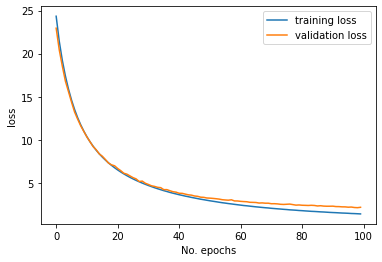

In [35]:
# plotting the loss on both training and validation data

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend(loc="upper right")
plt.ylabel('loss')
plt.xlabel('No. epochs')
plt.show()

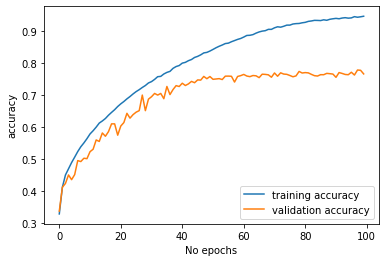

0.7652243375778198


In [36]:
# plotting accuracy on training and validation data

plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.xlabel('No epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.show()
print(history.history['val_acc'][-1])